# Construct a Processed Subset of NSYNTH

## Setup

In [86]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# ENABLE IF USING COLAB
USE_COLAB = False

if USE_COLAB:
    import os
    import shutil
    if os.path.exists('/content/sample_data/'):
        shutil.rmtree('/content/spectroconv/') #deletes a directory and all its contents.
    !git clone https://github.com/jakeval/spectroconv.git
    !pip install hub
    !pip install hub[audio]
    import sys
    sys.path.insert(0,'/content/spectroconv')

In [117]:
from data_utils import preprocessing
from data_utils import nsynth_adapter as na
from data_utils.dataset_constructor import DatasetConstructor

from matplotlib import pyplot as plt
import numpy as np

## Initialize the test dataset constructor
You will need to write an activeloop hub access token to the file 'api_key' in your working directory (/content/ for colab)

In [145]:
token = None
with open('./api_key') as f:
    token = f.read().strip()
preprocessor = preprocessing.SpectrogramPreprocessor(max_freq=8000, window_size=1024, n_mels=128)
dc = DatasetConstructor(preprocessor, source='test', target='test', token=token)
print("initialize...")
start_df = dc.initialize_dataset()
print("select subset")
subset = dc.select_random_subset(instruments_per_family=32)
shape, size = dc.calculate_new_dataset_size()
print(f"New dataset will be {size} gb and have shape {shape}.")

initialize...
Opening dataset in read-only mode as you don't have write permissions.
hub://activeloop/nsynth-test loaded successfully.
This dataset can be visualized at https://app.activeloop.ai/activeloop/nsynth-test.
select subset
New dataset will be 0.120397824 gb and have shape (3312, 128, 71).


## Visualize some of the data
We show the data as-is and then "zoomed in"

start loading 13 samples
finished loading!
(13, 64000)


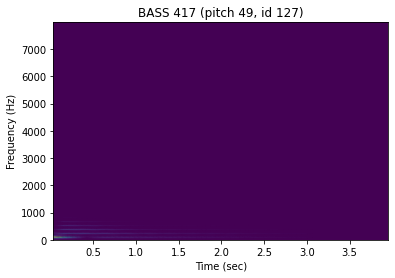

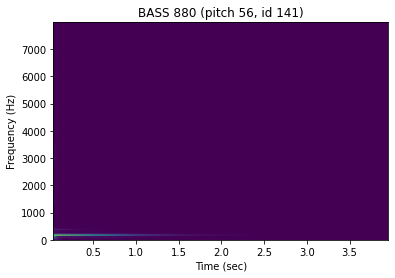

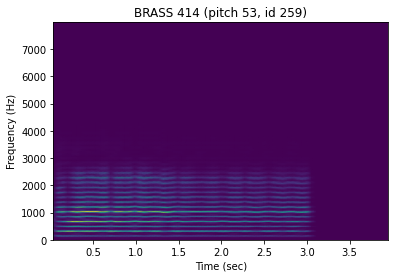

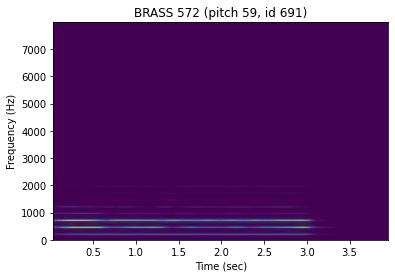

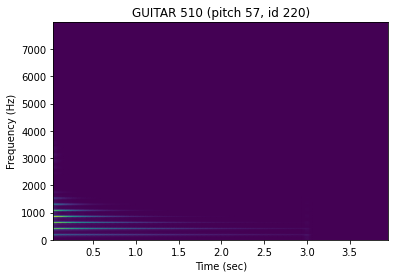

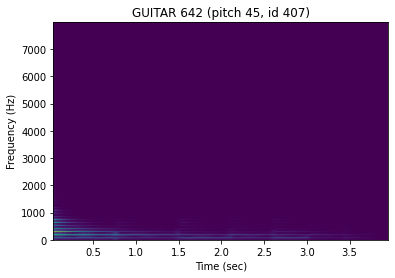

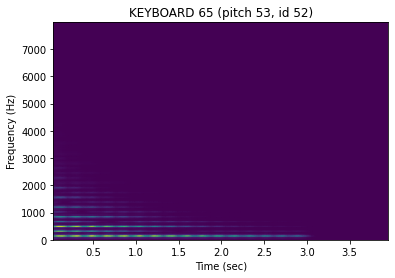

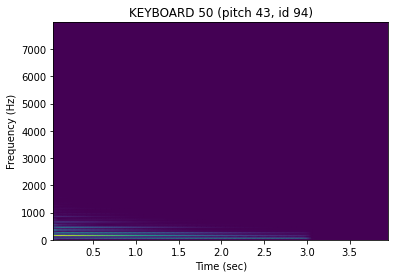

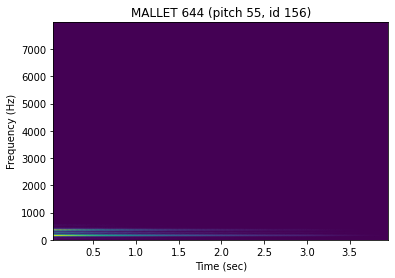

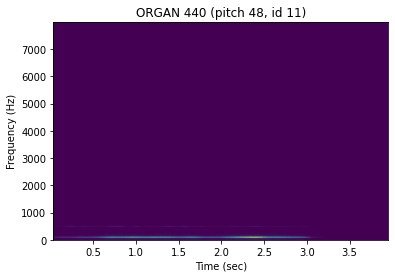

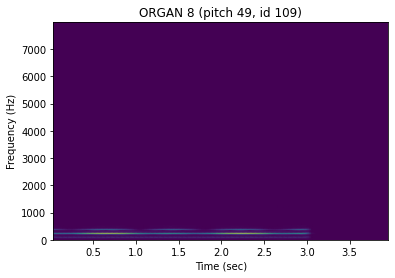

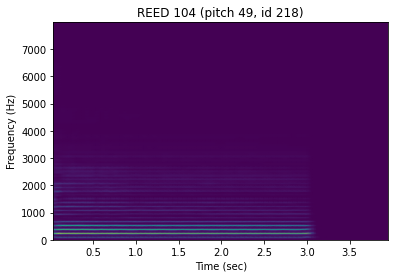

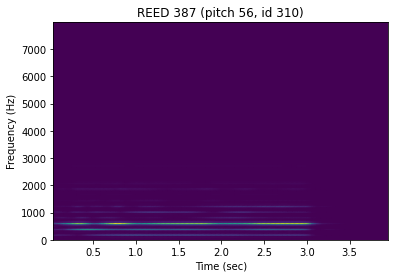

In [148]:
df = dc.visualize_new_dataset()
for i in range(df.shape[0]):
    spectrogram = df.iloc[i]['audio']
    fig, ax = spectrogram.visualize()
    instrument_family = na.InstrumentFamily(df.iloc[i]['family']).name
    instrument = df.iloc[i]['instrument']
    ax.set_title(f"{instrument_family} {instrument} (pitch {df.iloc[i]['pitch']}, id {df.iloc[i]['id']})")
    plt.show(fig)
    spectrogram.play()

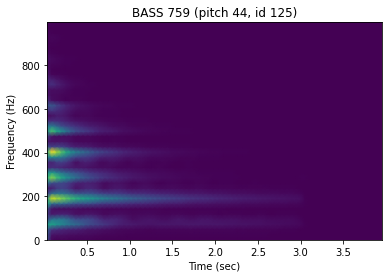

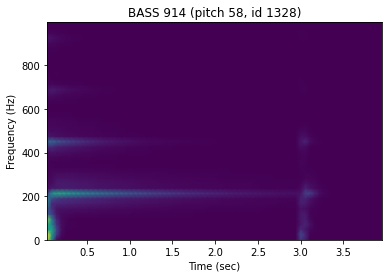

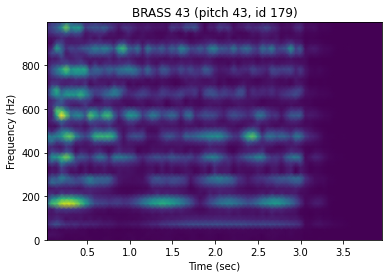

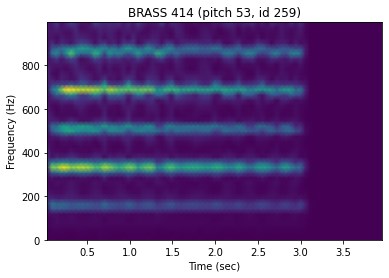

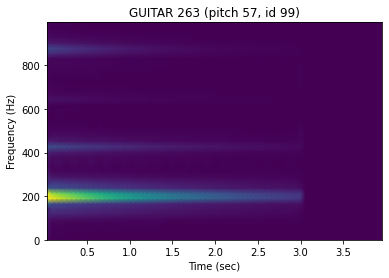

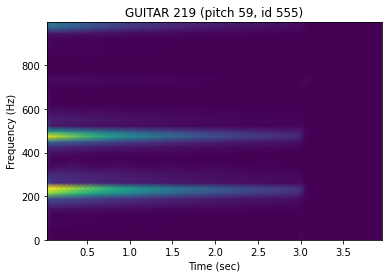

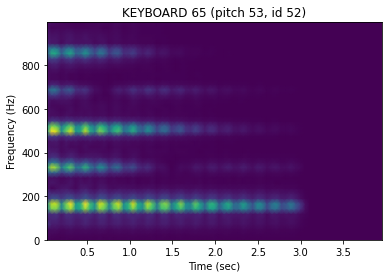

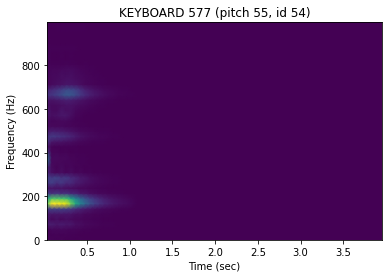

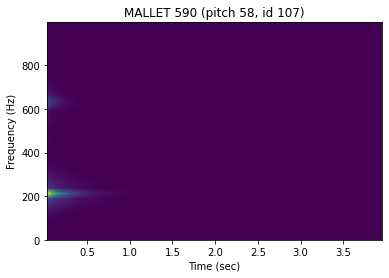

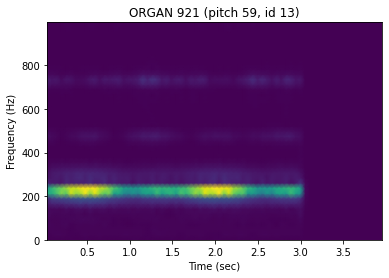

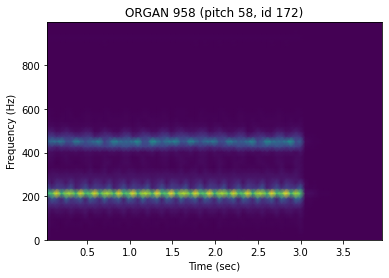

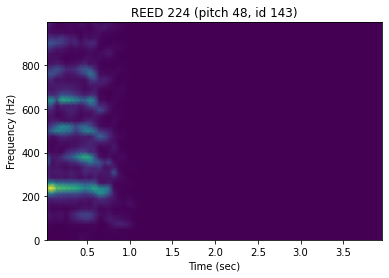

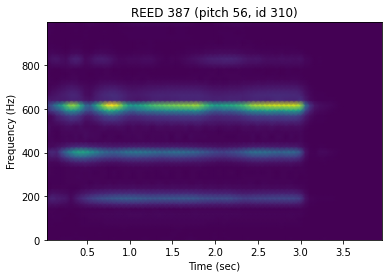

In [142]:
for i in range(df.shape[0]):
    spectrogram = df.iloc[i]['audio']
    fig, ax = spectrogram.visualize(max_freq=1000)
    instrument_family = na.InstrumentFamily(df.iloc[i]['family']).name
    instrument = df.iloc[i]['instrument']
    ax.set_title(f"{instrument_family} {instrument} (pitch {df.iloc[i]['pitch']}, id {df.iloc[i]['id']})")
    plt.show(fig)
    spectrogram.play()

## Write the data to a new dataset
This streams the data from the source dataset to the target dataset. It processes the data by taking the spectrogram and compressing it. This will take some minutes.

In [149]:
dc.write_subset_to_dataset()

3312 clips will be written in 7 chunks.
Write the metadata...
Your Hub dataset has been successfully created!
The dataset is private so make sure you are logged in!
This dataset can be visualized at https://app.activeloop.ai/jakeval/nsynth-test-metadata.
Finished. Writing spectrograms...
Your Hub dataset has been successfully created!
The dataset is private so make sure you are logged in!
This dataset can be visualized at https://app.activeloop.ai/jakeval/nsynth-test.
Load 488 audio clips...
Take the spectrogram...
Write to the database...
Wrote data chunk 1/7 in 13.709130048751831 seconds. ~1.3709130048751832 minutes remaining.
Load 488 audio clips...
Take the spectrogram...
Write to the database...
Wrote data chunk 2/7 in 7.624787092208862 seconds. ~0.31769946217536926 minutes remaining.
Load 488 audio clips...
Take the spectrogram...
Write to the database...
Wrote data chunk 3/7 in 9.77692699432373 seconds. ~0.21726504431830512 minutes remaining.
Load 488 audio clips...
Take the spe

## Do the same for the validation dataset

In [163]:
dc = DatasetConstructor(preprocessor, source='validate', target='validate', token=token)
print("initialize...")
start_df = dc.initialize_dataset()
print("select subset")
subset = dc.select_random_subset(instruments_per_family=32)
shape, size = dc.calculate_new_dataset_size()
print(f"New dataset will be {size} gb and have shape {shape}.")

initialize...
Opening dataset in read-only mode as you don't have write permissions.
hub://activeloop/nsynth-val loaded successfully.
This dataset can be visualized at https://app.activeloop.ai/activeloop/nsynth-val.
select subset
New dataset will be 0.39950848 gb and have shape (10990, 128, 71).


In [ ]:
dc.write_subset_to_dataset()

## And finally the train dataset

In [164]:
dc = DatasetConstructor(preprocessor, source='train', target='train', token=token)
print("initialize...")
start_df = dc.initialize_dataset()
print("select subset")
subset = dc.select_random_subset(instruments_per_family=32)
shape, size = dc.calculate_new_dataset_size()
print(f"New dataset will be {size} gb and have shape {shape}.")

initialize...
Opening dataset in read-only mode as you don't have write permissions.
hub://activeloop/nsynth-train loaded successfully.
This dataset can be visualized at https://app.activeloop.ai/activeloop/nsynth-train.
select subset
New dataset will be 2.57026816 gb and have shape (70705, 128, 71).


In [ ]:
dc.write_subset_to_dataset()